<a href="https://colab.research.google.com/github/T1Duff/versioned_dir/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! ls gdrive/MyDrive

'2nd year Neuroscience.pptx'
'3 year Pharmacology'
'AI and Machine Learning'
'Antineoplastic drugs.gdoc'
'Brain Tumors.zip'
'Cells to systems powerpoints.zip'
 CMDT
'Colab Notebooks'
'Copy of Untitled document.gdoc'
'Current Standard CS v1.4.gdoc'
 Drug_images.zip
'DUFFY, Thomas 2018890.pdf'
 EBSCO
 Eye_scans.zip
 flower_photos.zip
'formulation theory revision.docx'
'Further Mathematics-20240226T140328Z-001.zip'
 Gels.docx
'Grant Requisition and Payment Details form 21-22.docx'
'Learning Journal 1 (1).doc.gdoc'
'Learning Journal 1.doc.gdoc'
 leash-BELKA.zip
 Mathematics-20240226T140329Z-001.zip
 PhD
'Practise Questions.gdoc'
'Question 1 Glial cells .gdoc'
'Question 4 - alzheimers.gdoc'
 reactions.zip
 renal.pptx
'Slide for PhD meeting .gslides'
 Solubility.docx
 Solutions.docx
'SPSS tutorials .gdoc'
'Third year work '
 tom.docx
 tom.gdoc
 traffic.zip
'Uni 3rd year '
'Uni revision '
 Untitled
 Untitled0.ipynb
'Untitled (1)'
'Untitled document (10).gdoc'
'Untitled document (11).gdoc'
'Un

In [ ]:
!unzip gdrive/MyDrive/Brain\ Tumors.zip

Archive:  gdrive/MyDrive/Brain Tumors.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflati

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

plt.style.use("ggplot")
%matplotlib inline



#Data Formation


In [ ]:
X = []
Z = []

IMG_SIZE = 150
TRAIN_GLIOMA = '/content/Training/glioma_tumor'
TRAIN_NONE = '/content/Training/no_tumor'
TRAIN_MENG = '/content/Training/meningioma_tumor'
TRAIN_PIT = '/content/Training/pituitary_tumor'
TEST_GLIOMA = '/content/Testing/glioma_tumor'
TEST_NONE = '/content/Testing/no_tumor'
TEST_MENG = '/content/Testing/meningioma_tumor'
TEST_PIT  = '/content/Testing/pituitary_tumor'


In [ ]:
def assign_label(img, tumor_type):
  return tumor_type

In [ ]:
def make_train_data(tumor_type,DIR):
    for img in os.listdir(DIR):
        print('print DIR:',DIR)
        #print('print listdir :',os.listdir(DIR))
        label=assign_label(img,tumor_type)
        path = os.path.join(DIR,img)
        print(path)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
TX = []
TZ = []

def make_test_data(tumor_type, DIR):
  for img in os.listdir(DIR):
    print('print DIR:', DIR)
    label = assign_label(img, tumor_type)
    path = os.path.join(DIR,img)
    print(path)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    TX.append(np.array(img))
    TZ.append(str(label))


In [ ]:
make_train_data('Glioma', TRAIN_GLIOMA)

print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (738).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (740).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (454).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (374).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (704).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (161).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (221).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (666).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (190).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (445).jpg
print DIR: /content/Training/glioma_tumor
/content/Training/glioma_tumor/gg (134).jpg
print DIR: /content/Training/glioma_tumor
/content/Tra

In [ ]:
make_train_data('None', TRAIN_NONE)

print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(209).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(134).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(265).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(81).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(108).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image (30).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(2).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(255).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(215).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(63).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(321).jpg
print DIR: /content/Training/no_tumor
/content/Training/no_tumor/image(168).jpg
print DIR: /content/Training/no_tumor
/conte

In [ ]:
make_train_data('Meningioma', TRAIN_MENG)

print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (142).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m3 (118).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (174).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m2 (172).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m1(10).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (173).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (48).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (108).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m2 (45).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningioma_tumor/m (52).jpg
print DIR: /content/Training/meningioma_tumor
/content/Training/meningi

In [ ]:
make_train_data('Pituitary', TRAIN_PIT)

print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (653).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (158).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (11).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (320).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (210).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (424).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (121).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (233).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (58).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (462).jpg
print DIR: /content/Training/pituitary_tumor
/content/Training/pituitary_tumor/p (282).jpg
p

In [ ]:
make_test_data('Glioma', TEST_GLIOMA)

print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(81).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(2).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(63).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(22).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(37).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(94).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(55).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(51).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(23).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(64).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_tumor/image(62).jpg
print DIR: /content/Testing/glioma_tumor
/content/Testing/glioma_t

In [ ]:
make_test_data('None', TEST_NONE)

print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(81).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(2).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(63).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(22).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(37).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(94).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(55).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(51).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(23).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(64).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(62).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(104).jpg
print DIR: /content/Testing/no_tumor
/content/Testing/no_tumor/image(79).jpg

In [ ]:
make_test_data('Meningioma', TEST_MENG)

print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(81).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(2).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(63).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(22).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(37).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(94).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(55).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(51).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(126).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningioma_tumor/image(23).jpg
print DIR: /content/Testing/meningioma_tumor
/content/Testing/meningio

In [ ]:
make_test_data('Pituitary', TEST_PIT)

print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(81).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(2).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(63).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(22).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(37).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(94).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(55).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(51).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(23).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(64).jpg
print DIR: /content/Testing/pituitary_tumor
/content/Testing/pituitary_tumor/image(79).jpg


In [ ]:
le=LabelEncoder()
print(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
print(Y)
X=np.array(X)
X=X/255

['Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma',

In [ ]:
le=LabelEncoder()
print(TZ)
TY=le.fit_transform(TZ)
TY=to_categorical(TY,4)
print(TY)
TX=np.array(TX)
TX=TX/255

['Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma', 'Glioma',

#Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape
x_test.shape

(574, 150, 150, 3)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(4, activation = "softmax")
])

In [ ]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit(x_train,y_train,  epochs = 40, validation_split=0.1)

Epoch 1/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4155 - loss: 1.2225 - val_accuracy: 0.5391 - val_loss: 1.0133
Epoch 2/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6280 - loss: 0.9146 - val_accuracy: 0.7000 - val_loss: 0.7744
Epoch 3/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6892 - loss: 0.7418 - val_accuracy: 0.7522 - val_loss: 0.6169
Epoch 4/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7446 - loss: 0.6482 - val_accuracy: 0.7739 - val_loss: 0.6071
Epoch 5/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7196 - loss: 0.6574 - val_accuracy: 0.8000 - val_loss: 0.5496
Epoch 6/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7982 - loss: 0.4960 - val_accuracy: 0.8391 - val_loss: 0.4528
Epoch 7/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8114 - loss: 0.4659 - val_accuracy: 0.8304 - val_loss: 0.4649
Epoch 8/40
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8193 - loss: 0.4758 - val_accuracy: 0.8478 - 

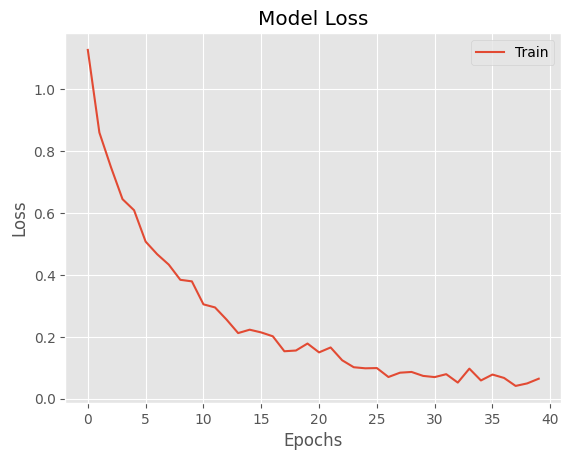

In [ ]:
plt.plot(History.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show()

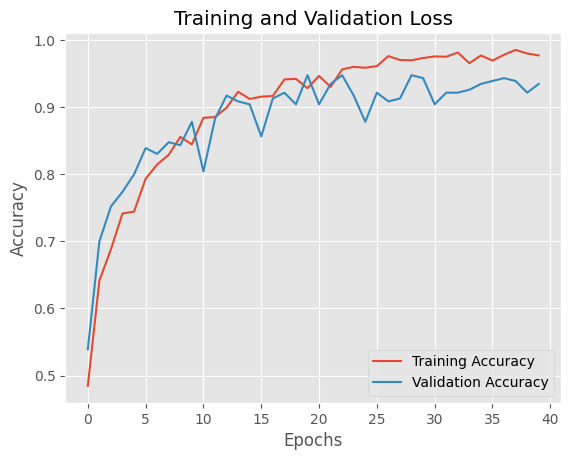

In [ ]:
plt.plot(History.history['accuracy'],label='Training Accuracy')
plt.plot(History.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9423 - loss: 0.2650
[0.32711097598075867, 0.9320557713508606]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
predicted label is  3


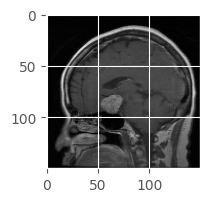

In [ ]:
loss_metric=model.evaluate(x_test,y_test)
print(loss_metric)
image_number =14
plt.figure(figsize=(2,2))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('predicted label is ',predicted_label.argmax())

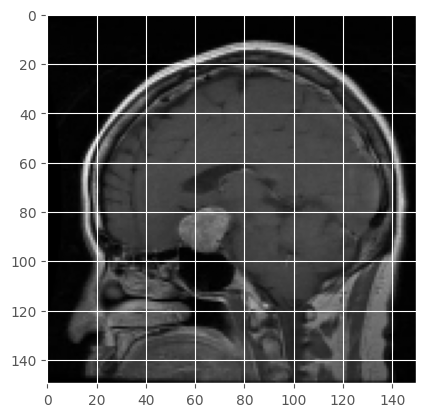

In [ ]:
plt.imshow(x_test[14])


In [ ]:
import random

In [ ]:
class_names = ['Glioma', 'Meningioma','None','Pituitary']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted label is  Glioma
Actual label is  Glioma


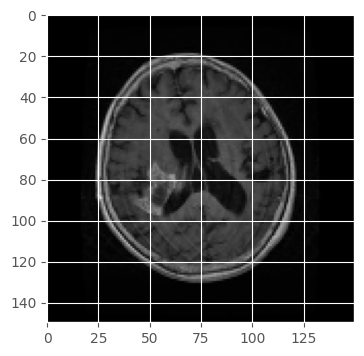

In [ ]:
image_number = random.randint(0,573)
plt.figure(figsize=(4,4))
plt.imshow(x_test[image_number][:,:,::-1])
predicted_label = pred = model.predict(x_test[image_number].reshape(1, 150, 150, 3))
print('Predicted label is ', class_names[predicted_label.argmax()])
print('Actual label is ', class_names[y_test[image_number].argmax()])

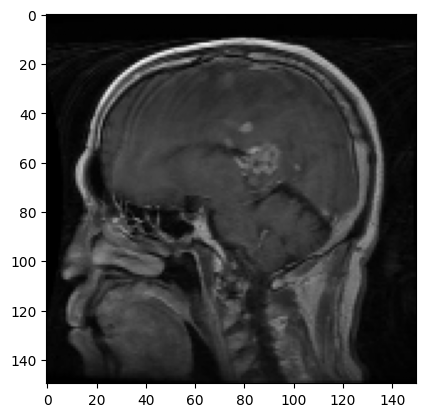

In [ ]:
plt.imshow(x_test[image_number])

In [ ]:
preds = []

for img in TX:
  pred = model.predict(img.reshape(1, 150, 150, 3))
  preds.append(class_names[pred.argmax()])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted label is  None
Actual label is  None


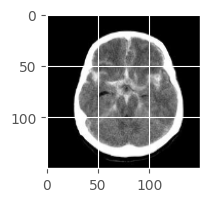

In [ ]:
image_number = random.randint(0,393)
plt.figure(figsize=(2,2))
plt.imshow(TX[image_number][:,:,::-1])
predicted_label = pred = model.predict(TX[image_number].reshape(1, 150, 150, 3))
print('Predicted label is ', class_names[predicted_label.argmax()])
print('Actual label is ', TZ[image_number])